<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [3]:
import pandas as pd
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [4]:
train_df = pd.read_csv("../raw_data/fairface/fairface_label_train.csv")
test_df = pd.read_csv("../raw_data/fairface/fairface_label_val.csv")

In [5]:
train_df

,file,age,gender,race,service_test
0,train/1.jpg,50-59,Male,East Asian,True
1,train/2.jpg,30-39,Female,Indian,False
2,train/3.jpg,3-9,Female,Black,False
3,train/4.jpg,20-29,Female,Indian,True
4,train/5.jpg,20-29,Female,Indian,True
...,...,...,...,...,...
86739,train/86740.jpg,20-29,Male,Indian,True
86740,train/86741.jpg,10-19,Male,Indian,True
86741,train/86742.jpg,more than 70,Female,Indian,True
86742,train/86743.jpg,10-19,Female,Black,True


In [6]:
100*train_df.groupby(['race']).count()[['file']]/train_df.groupby(['race']).count()[['file']].sum()

,file
race,
Black,14.102416
East Asian,14.164668
Indian,14.201559
Latino_Hispanic,15.409711
Middle Eastern,10.624366
Southeast Asian,12.444665
White,19.052615


In [7]:
idx = train_df[(train_df['race'] == 'East Asian') | (train_df['race'] == 'Southeast Asian')].index
train_df.loc[idx, 'race'] = 'Asian'
 
idx = test_df[(test_df['race'] == 'East Asian') | (test_df['race'] == 'Southeast Asian')].index
test_df.loc[idx, 'race'] = 'Asian'

In [8]:
target_size = (224, 224)
def getImagePixels(file):
    
    path = os.path.join("../raw_data/fairface", file)
    
    img = load_img(path, grayscale=False, target_size=target_size)
    x = np.array(img)
    return x

In [9]:
train_df_1k = train_df.iloc[:1000,:]
test_df_1k = test_df.iloc[:1000,:]


train_df_1k['pixels'] = train_df_1k['file'].apply(getImagePixels)
test_df_1k['pixels'] = test_df_1k['file'].apply(getImagePixels)
# Now, images pixels are stored as a column

/var/folders/vp/w0q6bwv17zg47jg_mhc4nsdh0000gp/T/ipykernel_35246/4172621959.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_1k['pixels'] = train_df_1k['file'].apply(getImagePixels)
/var/folders/vp/w0q6bwv17zg47jg_mhc4nsdh0000gp/T/ipykernel_35246/4172621959.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_1k['pixels'] = test_df_1k['file'].apply(getImagePixels)


In [12]:
train_df_1k.head()

,file,age,gender,race,service_test,pixels
0,train/1.jpg,50-59,Male,Asian,True,"[[[8.0, 8.0, 10.0], [9.0, 9.0, 11.0], [10.0, 8..."
1,train/2.jpg,30-39,Female,Indian,False,"[[[129.0, 127.0, 104.0], [127.0, 125.0, 102.0]..."
2,train/3.jpg,3-9,Female,Black,False,"[[[216.0, 171.0, 174.0], [212.0, 167.0, 170.0]..."
3,train/4.jpg,20-29,Female,Indian,True,"[[[42.0, 47.0, 50.0], [42.0, 47.0, 50.0], [41...."
4,train/5.jpg,20-29,Female,Indian,True,"[[[44.0, 39.0, 35.0], [44.0, 39.0, 35.0], [43...."


In [10]:
train_df['pixels'] = train_df['file'].apply(getImagePixels)
test_df['pixels'] = test_df['file'].apply(getImagePixels)
# Now, images pixels are stored as a column

In [12]:
train_df.to_csv("../raw_data/fairface/train_df.csv")

In [13]:
test_df.to_csv("../raw_data/fairface/test_df.csv")

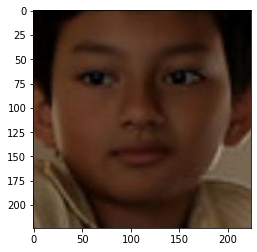

In [15]:
import matplotlib.pyplot as plt

plt.imshow(test_df["pixels"][0], cmap="gray")
plt.show()